# EmbracePlus vs E4

In [38]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
#pip install git+https://github.com/PCdLf/wearables_python.git
import wearables_python
import pandas as pd

## 1. Introduction
The OSF pre-registration outlines that we will collect the following biometric data: Electrodermal Activity (EDA), Heart Rate (HR), and potentially Temperature (TEMP) and Blood Volume Pulse (BVP). This notebook provides brief comparative information relevant to this study, rather than an extensive review of the devices.

One of the greater concerns with using both devices in the same experiment is that we won't be able to match the start time. This should not be an issue, as the E4 has a beginning timestamp and the EmbracePlus provides timestamps throughout. I've provided a code in section 1.3 that cleans the raw data from the EmbracePlus, removing irrelivant information and only displaying entries from the start to end time. Later analysis will require that we match all of the data to the start time of each experiment.

With that concern aside, another one arises: While the EmbracePlus measures the same biomarkers as the E4 (and more), it records significantly fewer data points. For EDA specifically, the E4 records one data entry per ~0.2 seconds, whereas the EmbracePlus records one data entry per minute.

Furthermore, if we choose to also study BVP, it may be best to leave out the EmbracePlus data as it does not directly measure BVP. It measures Pulse Rate (direct equivalent to HR) and Pulse Rate Variablity (PRV), which are derived from the BVP, but the BVP data is not available.

(This notebook is incomplete...it's readable but I will have more information soon!)

## 2.    EmbracePlus

### 2.1 Biomarkers

- **Accelerometer Standard Deviation**

- **Actigraphy Counts**

- **Activity Classification**

- **Activity Counts**

- **Activity Intensity**

- **Body Position**

- **Electrodermal Activity (EDA)**

    EDA (Skin Conductance Level) values are presented in microSiemens ($\mu\text{S}$). Values are provided every 1 minute and are derived from non-overlapping 1-minute windows. At least 1 sample of EDA data is needed to provide an output.

- **Metabolic Equivalent of Task (MET)**

- **Pulse Rate Variability (PRV)**

    Pulse Rate Variability values are expressed as the root-mean-square of successive differences (RMSSDs) between consecutive systolic peaks detected on the PPG signal, in milliseconds. The RMSSD values are provided every 1 minute from inter-beat-interval (IBI) series that occur within non-overlapping windows of the same duration. 

- **Pulse Rate**

    Pulse rate is presented as beats per minute (BPM). It is provided every 1 minute and is obtained by combining 10-seconds overlapping windows of raw sensor data with steps of 1 second.

- **Respiratory Rate**

    Respiratory Rate is presented as breaths per minute (brpm). It is provided every 1 minute and is obtained by combining 30-seconds overlapping windows of raw sensor data with steps of 5 seconds.

- **Skin Temperature**

    Temperature is presented in Celsius ($^\circ\text{C}$), or in Fahrenheit ($^\circ\text{F}$) as configured by the operating institution. Values are provided every 1 minute and are computed on a non-overlapping 1-minute window of raw sensor data.

- **Sleep**

    Sleep periods values are expressed as “awake”, “sleep stage” and “wake stage”. The values are provided every 30 seconds.
    
- **Steps**

- **Wearing Time**

### 2.2 Limitations

- A mobile device can only pair with one EmbracePlus at a time. If you would like to record with two EmbracePluses, you will need two mobile devices.

- Requires strong WiFi and Bluetooth connection; device will promptly stop recording if both are not supported. 

### 2.3 Code

There exists a package by Peter de Looff and Selin Acan from MIT, `wearables_python`, that takes the zip file downloaded from `carelab.empatica.com` for "Pre-process\[ing\], artifact detection, and feature extraction for Empatica EmbracePlus." This may be helpful if we proceed with using EmbracePlus data.

The following is my own code that cleans up raw EDA, Heart Rate, and Temperature data.


In [47]:
import pandas as pd

# edit the file paths to the location of the CSV files on your computer
eda_df = "/Users/cadyngo/Desktop/J3A/eda.csv"
hr_df = "/Users/cadyngo/Desktop/J3A/pulse-rate.csv"
temp_df = "/Users/cadyngo/Desktop/J3A/temperature.csv"

def eda(eda_df):
    """
    Processes raw EDA data from a CSV file and
    returns it with a timestamp (UTC) and corresponding EDA.
    """

    df = pd.read_csv(eda_df)
    df['Time (UTC)'] = pd.to_datetime(df['timestamp_iso']).dt.time
    df = df.drop(columns=['timestamp_iso', 'timestamp_unix', 'participant_full_id', 'missing_value_reason'])
    df = df.dropna(subset=['eda_scl_usiemens'])
    df.rename(columns={'eda_scl_usiemens': 'EDA'}, inplace=True)
    
    return df

def hr(hr_df):
    """
    Processes raw HR data from a CSV file and
    returns it with a timestamp (UTC) and corresponding HR.
    """

    df = pd.read_csv(hr_df)
    df['Time (UTC)'] = pd.to_datetime(df['timestamp_iso']).dt.time
    df = df.drop(columns=['timestamp_iso', 'timestamp_unix', 'participant_full_id', 'missing_value_reason'])
    df = df.dropna(subset=['pulse_rate_bpm'])
    df.rename(columns={'pulse_rate_bpm': 'HR'}, inplace=True)
    
    return df

def temp(temp_df):
    """
    Processes raw temperature data from a CSV file and
    returns it with a timestamp (UTC) and corresponding temperature.
    """

    df = pd.read_csv(temp_df)
    df['Time (UTC)'] = pd.to_datetime(df['timestamp_iso']).dt.time
    df = df.drop(columns=['timestamp_iso', 'timestamp_unix', 'participant_full_id', 'missing_value_reason'])
    df = df.dropna(subset=['temperature_celsius'])
    df.rename(columns={'temperature_celsius': 'Temperature'}, inplace=True)
    
    return df


print(eda(eda_df).head())
print(hr(hr_df).head())
print(temp(temp_df).head())

       EDA Time (UTC)
1044  0.12   17:24:00
1045  0.05   17:25:00
1046  0.05   17:26:00
1047  0.18   17:27:00
1048  0.17   17:28:00
         HR Time (UTC)
1044  104.0   17:24:00
1045   99.0   17:25:00
1046   98.0   17:26:00
1047   97.0   17:27:00
1048   97.0   17:28:00
      Temperature Time (UTC)
1044        28.63   17:24:00
1045        29.36   17:25:00
1046        29.80   17:26:00
1047        30.02   17:27:00
1048        30.17   17:28:00


## 3. E4

### 3.1 Biomarkers

- **Accelerometer (ACC)**
    
    Data from 3-axis accelerometer sensor. The accelerometer is configured to measure acceleration in the range $[-2g, 2g]$. Therefore the unit in this file is 1/64g. Data from $x$, $y$, and $z$ axis are respectively in first, second, and third column.

- **Blood Volume Pulse (BVP)**

    Data from photoplethysmograph.

- **Electrodermal Activity (EDA)**
    
    Data from the electrodermal activity sensor expressed as microsiemens ($\mu\text{S}$).

- **Heart Rate (HR)**

    Average heart rate extracted from the BVP signal. The first row is the initial time of the session expressed as unix timestamp in UTC. The second row is the sample rate expressed in $Hz$.

- **Inter-Beat-Interval (IBI)**

    Time between individuals heart beats extracted from the BVP signal. No sample rate is needed for this file. The first column is the time (respect to the initial time) of the detected inter-beat interval expressed in seconds (s). The second column is the duration in seconds (s) of the detected inter-beat interval (i.e., the distance in seconds from the previous beat).

- **Temperature (TEMP)**

    Data from temperature sensor expressed degrees on the Celsius ($^\circ\text{C}$) scale.

- **Time Stamp (tags)**

    Event mark times. Each row corresponds to a physical button press on the device; the same time as the status LED is first illuminated. The time is expressed as a unix timestamp in UTC and it is synchronized with initial time of the session indicated in the related data files from the corresponding session.

### 3.2 Limitations

- Discontinued :(

## 4. Comparison

### 4.1 Biometric Comparison

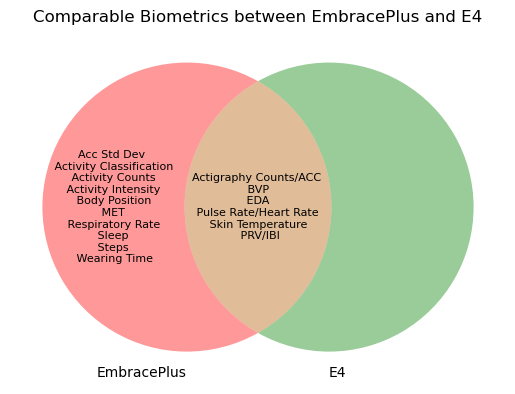

In [48]:
venn = venn2(subsets=(3, 3, 2), set_labels=('EmbracePlus', 'E4'))

for text in venn.set_labels:
    text.set_fontsize(10)
for text in venn.subset_labels:
    if text:
        text.set_fontsize(8)

venn.get_label_by_id('10').set_text('Acc Std Dev \n Activity Classification \n Activity Counts \n Activity Intensity \n Body Position \n MET \n Respiratory Rate \n Sleep \n Steps \n Wearing Time')
venn.get_label_by_id('01').set_text('BVP')
venn.get_label_by_id('11').set_text('Actigraphy Counts/ACC \n EDA \n Pulse Rate/Heart Rate \n Skin Temperature \n PRV/IBI')

plt.title('Comparable Biometrics between EmbracePlus and E4')
plt.show()

## 5. Recommendation